In [2]:
import os  
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model,Input
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from sklearn import linear_model   
import seaborn as sns
from matplotlib import style
from sklearn import svm
import numpy as np
%matplotlib inline


/opt/jupyterhub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
print ('tensorflow_version: ',tf.__version__)
print ('keras_version: ',keras.__version__)

tensorflow_version:  1.4.1
keras_version:  2.0.8


In [4]:
df = pd.read_csv('/datc/opschaler/combined_gas_smart_weather_dfs/processed/all_dwellings_combined_hour.csv', delimiter='\t', parse_dates=['datetime'], engine = 'python')
df = df.set_index(['datetime']) 

In [5]:
df.head()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,DD,DR,FF,...,RG,SQ,T,T10,TD,U,VV,WW,dwelling,gasPower
datetime,,,,,,,,,,,,,,,,,,,,,
2017-03-07 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,307.44101,305.450012,0.0,5.341667,...,0.0,7.631617,8.733334,9.133333,4.883333,76.500000,31916.666016,1.333333,P01S01W7548,NaN
2017-03-07 16:00:00,625.401001,0.0,359.501007,0.0,383.994446,0.0,307.44101,288.200012,0.0,5.418334,...,0.0,10.000000,9.116667,10.750000,5.416667,77.166664,23800.000000,2.666667,P01S01W7548,0.0
2017-03-07 17:00:00,625.679993,0.0,359.501007,0.0,277.722229,0.0,307.44101,285.866669,0.0,4.593333,...,0.0,2.936100,7.866667,8.450000,4.550000,78.833336,22233.333984,1.000000,P01S01W7548,0.0
2017-03-07 18:00:00,625.820984,0.0,359.501007,0.0,143.624283,0.0,307.44101,286.633331,0.0,3.783333,...,0.0,5.000000,7.066667,6.816667,4.433333,82.833336,20266.666016,2.500000,P01S01W7548,0.0
2017-03-07 19:00:00,625.963013,0.0,359.501007,0.0,143.376038,0.0,307.44101,278.783325,0.0,2.741667,...,0.0,0.000000,6.616667,6.016667,4.300000,84.666664,17433.333984,2.833333,P01S01W7548,0.0


In [10]:
df.isnull().sum()

eMeter              9166
eMeterReturn        9166
eMeterLow           9166
eMeterLowReturn     9166
ePower              9166
ePowerReturn        9166
gasMeter            9246
DD                    88
DR                    55
FF                    88
FX                    88
N                    264
P                     86
Q                     55
RG                    55
SQ                    55
T                     55
T10                   55
TD                    55
U                     55
VV                    55
WW                    55
dwelling               0
gasPower           10156
dtype: int64

In [11]:
df2 = df.dropna()

In [12]:
df2.head()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,DD,DR,FF,...,RG,SQ,T,T10,TD,U,VV,WW,dwelling,gasPower
datetime,,,,,,,,,,,,,,,,,,,,,
2017-03-07 16:00:00,625.401001,0.0,359.501007,0.0,383.994446,0.0,307.441010,288.200012,0.0,5.418334,...,0.0,10.0000,9.116667,10.750000,5.416667,77.166664,23800.000000,2.666667,P01S01W7548,0.000000
2017-03-07 17:00:00,625.679993,0.0,359.501007,0.0,277.722229,0.0,307.441010,285.866669,0.0,4.593333,...,0.0,2.9361,7.866667,8.450000,4.550000,78.833336,22233.333984,1.000000,P01S01W7548,0.000000
2017-03-07 18:00:00,625.820984,0.0,359.501007,0.0,143.624283,0.0,307.441010,286.633331,0.0,3.783333,...,0.0,5.0000,7.066667,6.816667,4.433333,82.833336,20266.666016,2.500000,P01S01W7548,0.000000
2017-03-07 19:00:00,625.963013,0.0,359.501007,0.0,143.376038,0.0,307.441010,278.783325,0.0,2.741667,...,0.0,0.0000,6.616667,6.016667,4.300000,84.666664,17433.333984,2.833333,P01S01W7548,0.000000
2017-03-07 20:00:00,626.458984,0.0,359.501007,0.0,499.144440,0.0,307.544006,245.816666,0.0,3.418333,...,0.0,0.0000,6.616667,6.183333,3.716667,81.333336,21733.333984,2.000000,P01S01W7548,0.102997


In [14]:
df2.describe()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,DD,DR,FF,...,Q,RG,SQ,T,T10,TD,U,VV,WW,gasPower
count,105438.000000,105438.000000,105438.000000,105438.000000,105438.000000,105438.000000,105438.000000,105438.000000,105438.000000,105438.000000,...,105438.000000,105438.000000,105438.000000,105438.000000,105438.000000,105438.000000,105438.000000,105438.000000,105438.000000,105438.000000
mean,2188.128952,712.533536,2486.201817,333.695771,305.315613,89.130576,1891.857218,198.246441,36.553216,4.019493,...,166.874908,0.086842,2.658388,12.411336,11.828819,8.275189,77.162141,25665.600677,10.692121,0.082684
std,1358.200911,1530.360810,1554.720072,713.645484,308.020684,372.236068,947.455451,86.406303,116.372130,2.216992,...,225.318195,0.492260,3.797826,5.267900,6.287956,4.315376,14.764073,12878.345741,16.686100,0.182727
min,264.398987,0.000000,103.486000,0.000000,0.000000,0.000000,195.733002,1.850000,0.000000,0.026667,...,0.000000,0.000000,0.000000,-1.700000,-5.916667,-3.133333,30.333334,142.333328,0.000000,0.000000
25%,1156.088287,0.000000,1269.757263,0.000000,125.036804,0.000000,1135.026489,133.483337,0.000000,2.318333,...,0.166667,0.000000,0.000000,8.800000,7.900000,4.716667,67.000000,15000.000000,1.916667,0.000000
50%,1740.150024,0.000000,2006.005005,0.000000,207.341591,0.000000,1737.864990,218.199997,0.000000,3.745000,...,34.833332,0.000000,0.000000,11.883333,11.500000,8.450000,79.166664,26233.333984,2.333333,0.008057
75%,2797.743896,808.130005,3728.372070,306.691986,378.388245,0.000000,2648.263916,260.983337,0.000000,5.368333,...,299.166656,0.000000,5.531600,16.025000,15.783333,11.800000,89.229166,35900.000000,10.000000,0.066162
max,5932.604004,7923.578125,7707.495117,3508.043945,4240.345703,5999.823242,4668.230957,356.816650,600.000000,15.426666,...,926.500000,18.166666,10.000000,30.683332,32.466667,20.383333,100.000000,49900.000000,81.800003,2.692017


In [15]:
df_mean = df2.gasPower.fillna(df['gasPower'].mean())

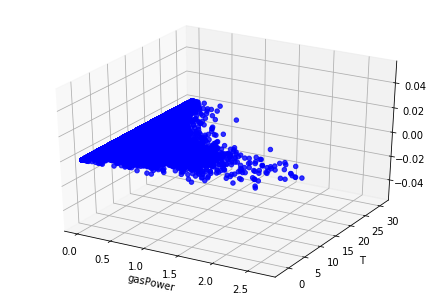

In [24]:
fig = plt.figure()
ax=
#ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['gasPower'],df2['T'],c='blue',marker='o',alpha=0.8)
ax.set_xlabel('gasPower')
ax.set_ylabel('T')
plt.show()

In [25]:
# Define the sequential model
model = Sequential()
model.add(Dense(1, input_dim=2, kernel_initializer='normal', activation='relu'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])

In [26]:
# creating model using Functional API
inputs = Input(shape=(2,))
preds = Dense(1,activation='linear')(inputs)

model_2 = Model(inputs=inputs,outputs=preds)
#sgd=keras.optimizers.SGD()
model_2.compile(optimizer='adam' ,loss='mse',metrics=['mse'])

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [31]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
# define a tensorboard callback
tensorboard = TensorBoard(log_dir="./keras_logs_multiple_lin_reg")
# Train the model
hist = model_2.fit(data_x,data_y, batch_size=1, epochs=150, shuffle=False,callbacks=[tensorboard])

NameError: name 'data_x' is not defined

In [ ]:
# visualizing losses and accuracy
num_epoch = 150
train_loss=hist.history['loss']
#val_loss=hist.history['val_loss']
#train_acc=hist.history['acc']
#val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
#plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])